## Logistic Regression wine dataset

In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the dataset

data_raw = pd.read_csv('wine.csv')
data_raw.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,neutral,white
1,6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,neutral,white
2,6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,slightly dissatisfied,white
3,7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,neutral,white
4,7.0,0.46,0.20,16.7,0.046,50.0,184.0,0.99898,3.08,0.56,9.4,slightly dissatisfied,white
5,6.4,0.69,0.09,7.6,0.044,34.0,144.0,0.99480,3.26,0.38,10.1,neutral,white
6,5.7,0.26,0.27,4.1,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,neutral,white
7,9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,slightly dissatisfied,red
8,7.1,0.75,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,neutral,red
9,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,neutral,white


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  color                 6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [4]:
round(data_raw.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90


In [5]:
#Determine the count number of value in Exited column to check is there any imbalanced issue in y.
data_raw['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [6]:
#Plot Bar Chart for Output Classes
#data_raw['color'].value_counts().plot('bar') 

<AxesSubplot:>

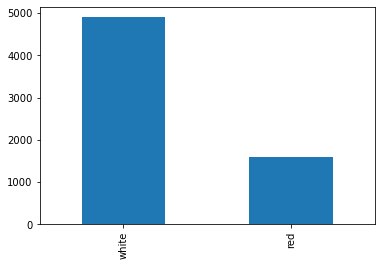

In [7]:
#Plot Bar Chart for Output Classes
data_raw['color'].value_counts().plot(kind='bar') # need to add kind = instead of bar only for this version

In [8]:
# Set the x attributes and y attribute 

X = data_raw.iloc[:, :-1]
y = data_raw.iloc[:, -1]

#X = df_raw.iloc[:, 0:12].values
#y = df_raw.iloc[:, -1].values

### Create dummy varaible 

In [9]:
# Transform Categorical Features with Dummy Variable

X = pd.get_dummies(X,drop_first=False)  # Activate the drop_first=False to keep the fisrst column (quality_extremly dissatisfied) for dummies data.
X.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_extremly dissatisfied,quality_extremly satisfied,quality_moderately dissatisfied,quality_moderately satisfied,quality_neutral,quality_slightly dissatisfied,quality_slightly satisfied
0,6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,0,0,0,0,1,0,0
1,6.7,0.51,0.24,2.1,0.043,14.0,155.0,0.99040,3.22,0.60,13.0,0,0,0,0,1,0,0
2,6.9,0.18,0.38,6.5,0.039,20.0,110.0,0.99430,3.10,0.42,10.5,0,0,0,0,0,1,0
3,7.6,0.24,0.44,3.8,0.037,49.0,146.0,0.99110,3.06,0.37,11.6,0,0,0,0,1,0,0
4,7.0,0.46,0.20,16.7,0.046,50.0,184.0,0.99898,3.08,0.56,9.4,0,0,0,0,0,1,0
5,6.4,0.69,0.09,7.6,0.044,34.0,144.0,0.99480,3.26,0.38,10.1,0,0,0,0,1,0,0
6,5.7,0.26,0.27,4.1,0.201,73.5,189.5,0.99420,3.27,0.38,9.4,0,0,0,0,1,0,0
7,9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,0,0,0,0,0,1,0
8,7.1,0.75,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,0,0,0,0,1,0,0
9,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,0,0,0,1,0,0


In [10]:
X.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality_extremly dissatisfied', 'quality_extremly satisfied',
       'quality_moderately dissatisfied', 'quality_moderately satisfied',
       'quality_neutral', 'quality_slightly dissatisfied',
       'quality_slightly satisfied'], dtype=object)

In [11]:
#Features Scalling using standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-0.39751104 -0.6054167  -0.12823371 ...  1.13617898 -0.70034239
  -0.44626335]
 [-0.39751104  1.03468634 -0.54115347 ...  1.13617898 -0.70034239
  -0.44626335]
 [-0.24322981 -0.96988404  0.42232597 ... -0.88014302  1.42787301
  -0.44626335]
 ...
 [-0.39751104  3.16074583 -1.7110928  ...  1.13617898 -0.70034239
  -0.44626335]
 [-0.24322981 -0.30169391 -0.12823371 ...  1.13617898 -0.70034239
  -0.44626335]
 [-0.62893288 -0.48392759  0.76642577 ... -0.88014302  1.42787301
  -0.44626335]]


In [12]:
# Split the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
X_train

array([[-0.78321411, -0.42318303,  0.00940621, ..., -0.88014302,
         1.42787301, -0.44626335],
       [-0.62893288,  0.06277343, -0.26587363, ..., -0.88014302,
        -0.70034239,  2.24082932],
       [-0.32037042, -0.54467214,  0.14704613, ...,  1.13617898,
        -0.70034239, -0.44626335],
       ...,
       [-0.86035472, -0.11946024, -0.54115347, ..., -0.88014302,
        -0.70034239,  2.24082932],
       [ 0.21961388,  0.36649621,  4.6891635 , ...,  1.13617898,
        -0.70034239, -0.44626335],
       [-1.47747964,  0.79170811, -1.43581296, ..., -0.88014302,
        -0.70034239,  2.24082932]])

In [14]:
y_train

2073    white
4993    white
4645    white
5095      red
5525    white
        ...  
664     white
3276    white
1318    white
723     white
2863      red
Name: color, Length: 5197, dtype: object

In [15]:
y_test

5142    white
3851      red
5047    white
1431      red
1307    white
        ...  
5408    white
3635      red
4358    white
6346    white
1244    white
Name: color, Length: 1300, dtype: object

In [16]:
# Train the logistic regression algorithm

from sklearn.linear_model import LogisticRegression 

LogR_model = LogisticRegression(random_state=1234) 
LogR_model.fit(X_train,y_train)

LogisticRegression(random_state=1234)

In [17]:
from sklearn.linear_model import LogisticRegression 

#LogR_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                   intercept_scaling=1, l1_ratio=None, max_iter=100,
#                   multi_class='auto', n_jobs=None, penalty='l2',
#                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
#                   warm_start=False)
#LogR_model.fit(X_train,y_train)

In [18]:
# Apply for Test Set

y_pred=LogR_model.predict(X_test)
y_pred

array(['white', 'red', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[299,   4],
       [  0, 997]], dtype=int64)

<AxesSubplot:>

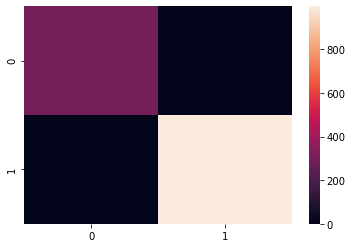

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=None)

<AxesSubplot:>

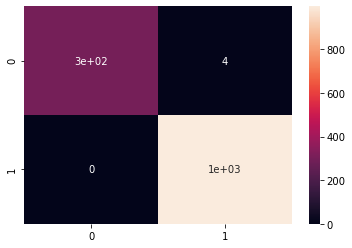

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

In [22]:
# Confusion Matrix
print(pd.crosstab(y_test,y_pred))

col_0  red  white
color            
red    299      4
white    0    997


In [23]:
# Precision & Sensitivity/Recall Report

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       303
       white       1.00      1.00      1.00       997

    accuracy                           1.00      1300
   macro avg       1.00      0.99      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [24]:
# Model Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy=round(accuracy,2)
print('Overall Accuracy score: ', accuracy,'%')

Overall Accuracy score:  99.69 %


In [26]:
# To predict for new data

print(LogR_model.predict(scaler.transform([[6.7,0.24,0.30,10.2,0.070,44.0,179.0,0.99666,2.86,0.46,8.9,1,0,0,0,1,0,0]])))
print(LogR_model.predict(scaler.transform([[9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,1,0,0,0,0,1,0]])))
print(LogR_model.predict(scaler.transform([[8.1,0.26,0.33,11.1,0.052,52.5,158.0,0.99760,3.03,0.49,10.2,1,0,0,0,0,0,1]])))

['white']
['red']
['white']


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
